# 🎬 Netflix Content Analysis Project

## 🎯 Project Objective

To conduct a comprehensive analysis of Netflix's content library, uncovering insights about content diversity, release patterns, audience preferences, and potential factors influencing viewer engagement and business strategies.

---

## 📊 Data Overview and Preparation
Let's start by importing necessary libraries and examining our dataset.

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [9]:
from datetime import datetime

# Load the dataset

In [11]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\Python Data Analysis\Netflix+Dataset.csv")

## Display basic information about the dataset

In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


### Show the first few rows

In [61]:
print(data.head())

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

## Convert Release_Date to datetime

In [67]:
data['Release_Date'] = data['Release_Date'].str.strip() # it seems some dates have a leading space. Let's try to clean that up

In [69]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [71]:
data.dtypes # Confirm the conversion of Release_Date to datetime

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

## 1. 🌍 Content Diversity Analysis

#### 1.1 Top Countries Peoducing Netflix Cotent

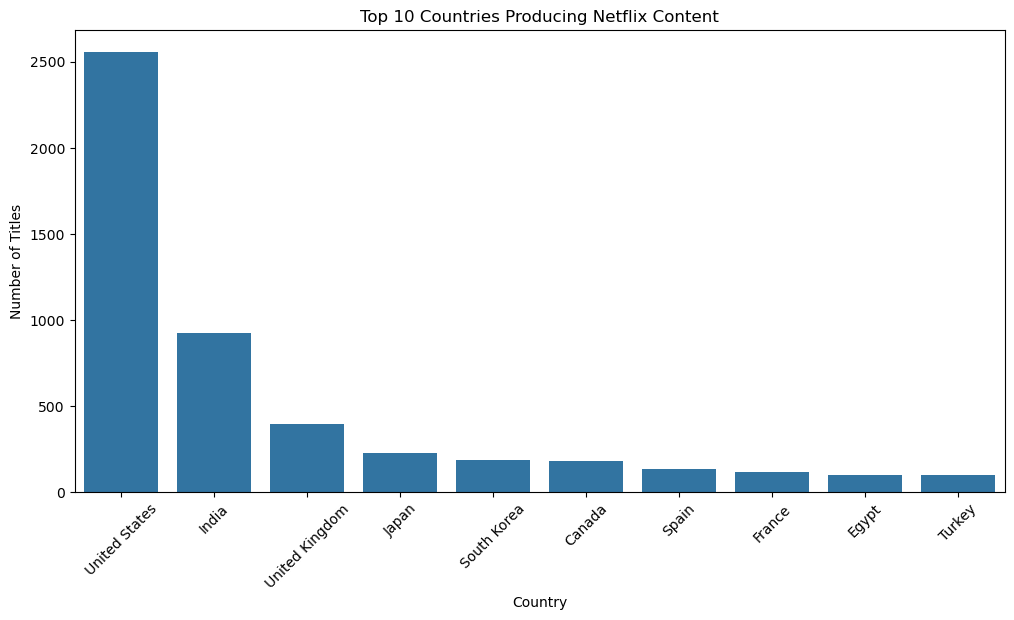

In [81]:
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## 2. 📅 Release Trends Analysis

#### 2.1 Content Additions Over Time

In [86]:
data['Release_Year'] = data['Release_Date'].dt.year
yearly_additions = data['Release_Year'].value_counts().sort_index()

In [88]:
yearly_additions

Release_Year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      25
2015.0      88
2016.0     443
2017.0    1225
2018.0    1685
2019.0    2154
2020.0    2010
2021.0     117
Name: count, dtype: int64

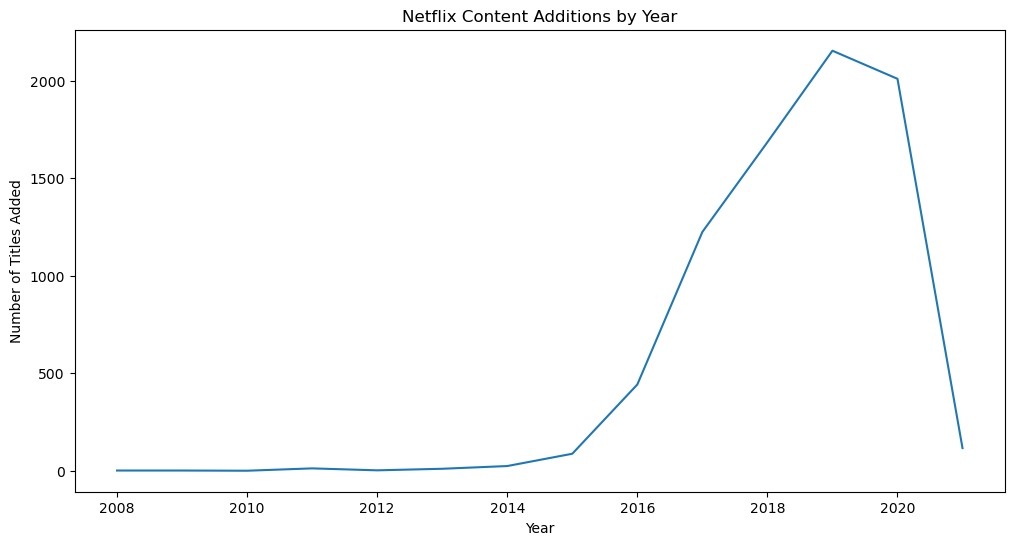

In [90]:
plt.figure(figsize=(12,6))
plt.plot(yearly_additions.index, yearly_additions.values)
plt.title('Netflix Content Additions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

### 2.2 Seasonal Release Patterns

In [114]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [116]:
monthly_additions.index = monthly_additions.index.map(month_map)

In [118]:
monthly_additions = monthly_additions.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fill_value=0)

In [122]:
monthly_additions

Month
Jan    757
Feb    472
Mar    669
Apr    602
May    543
Jun    542
Jul    600
Aug    618
Sep    620
Oct    785
Nov    738
Dec    833
dtype: int64

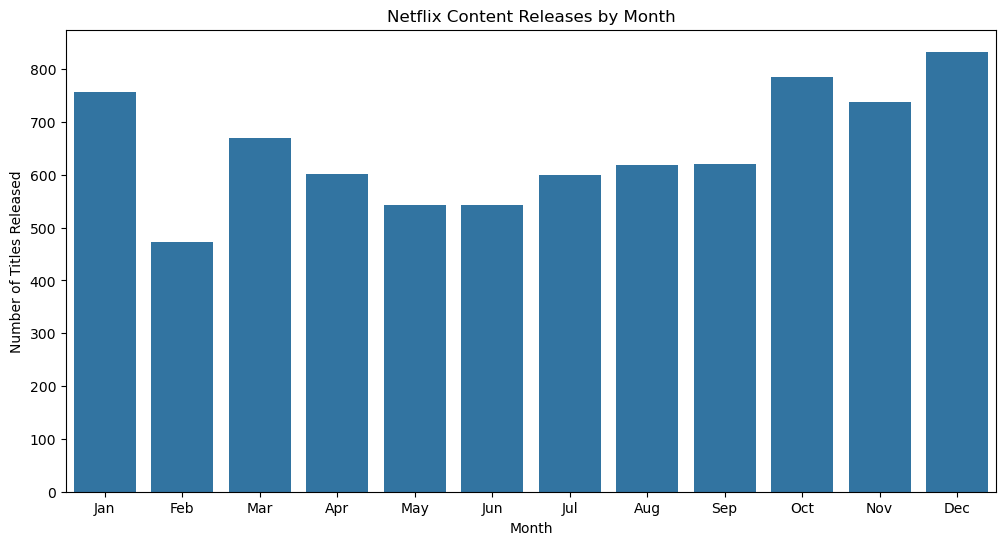

In [120]:
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values)
plt.title('Netflix Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Released')
plt.show()

### 3. 🌟 Rating Analysis

#### 3.1 Distribution of Ratings

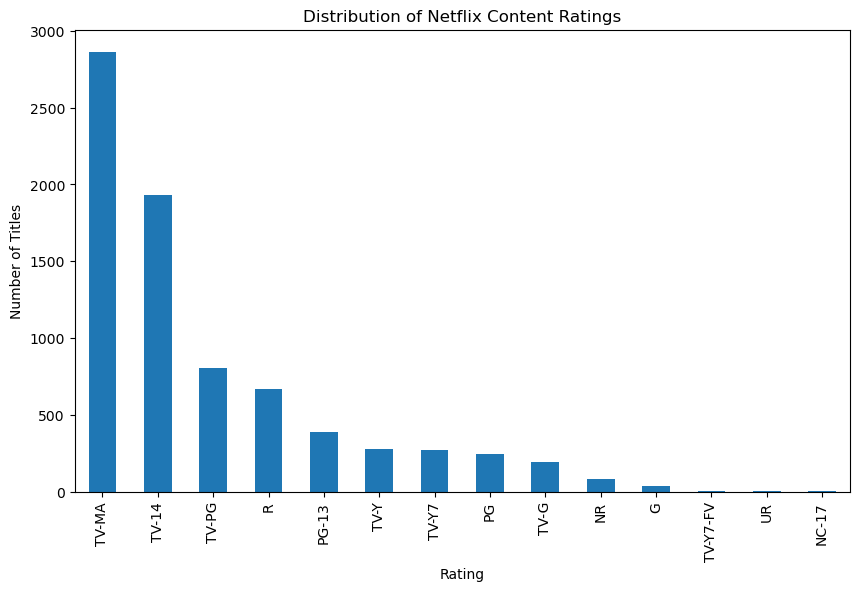

In [126]:
plt.figure(figsize=(10,6))
data['Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Netflix Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

### 4. 🕰️ Duration Analysis

#### 4.1 Average Duration by Content Type

In [145]:
data['Duration_Minutes'] = data['Duration'].str.extract('(\\d+)').astype(float)

### Average content duration

In [149]:
avg_duration = data['Duration_Minutes'].mean()

In [151]:
print(f"Average Content Duration: {avg_duration:.2f} minutes")

Average Content Duration: 69.13 minutes


### Common content duration

In [153]:
common_duration_range = data['Duration_Minutes'].mode()[0]

In [155]:
print(f"Most Common Content Duration: {common_duration_range} minutes")

Most Common Content Duration: 1.0 minutes


In [157]:
min_duration = data['Duration_Minutes'].min()
max_duration = data['Duration_Minutes'].max()

### Minimum content duration

In [159]:
print(f"Shortest Content Duration: {min_duration} minutes")

Shortest Content Duration: 1.0 minutes


### Longest content duration

In [161]:
print(f"Longest Content Duration: {max_duration} minutes")

Longest Content Duration: 312.0 minutes


## 4.2 Duration Trends Over Time

In [177]:
duration_trend = data.groupby(['Release_Year', 'Duration_Category'], observed=True).size().unstack()

In [179]:
duration_trend = data.groupby(['Release_Year', 'Duration_Category'], observed=True).size().unstack()

In [183]:
duration_trend

Duration_Category,0-30,31-60,61-90,91-120,120+
Release_Year,,,,,
2008.0,1.0,NaN,1.0,NaN,NaN
2009.0,1.0,NaN,NaN,1.0,NaN
2010.0,NaN,NaN,1.0,NaN,NaN
2011.0,NaN,NaN,1.0,12.0,NaN
2012.0,1.0,NaN,2.0,NaN,NaN
2013.0,5.0,1.0,3.0,1.0,1.0
2014.0,7.0,2.0,10.0,6.0,NaN
2015.0,32.0,8.0,32.0,11.0,5.0
2016.0,199.0,24.0,101.0,111.0,8.0


<Figure size 1400x800 with 0 Axes>

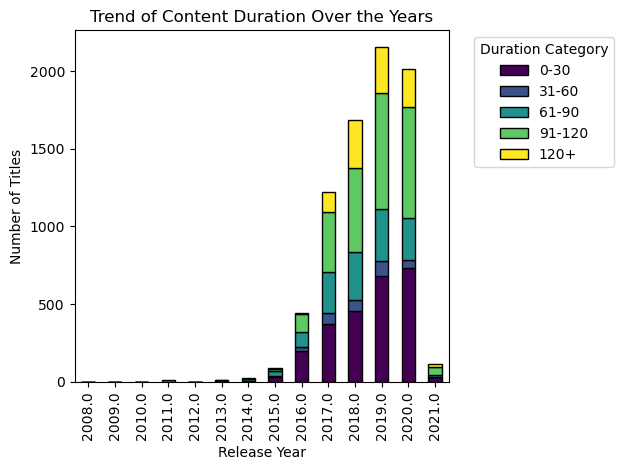

In [181]:
plt.figure(figsize=(14, 8))
duration_trend.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Trend of Content Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Duration Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5. 👥 Cast Analysis

#### 5.1 Top 10 Actors/Actresses by Appearance

In [188]:
all_cast = [cast for casts in data['Cast'].dropna() for cast in casts.split(', ')]
top_cast = Counter(all_cast).most_common(10)

In [190]:
top_cast

[('Anupam Kher', 42),
 ('Shah Rukh Khan', 35),
 ('Naseeruddin Shah', 30),
 ('Om Puri', 30),
 ('Takahiro Sakurai', 29),
 ('Akshay Kumar', 29),
 ('Boman Irani', 27),
 ('Amitabh Bachchan', 27),
 ('Paresh Rawal', 27),
 ('Yuki Kaji', 27)]

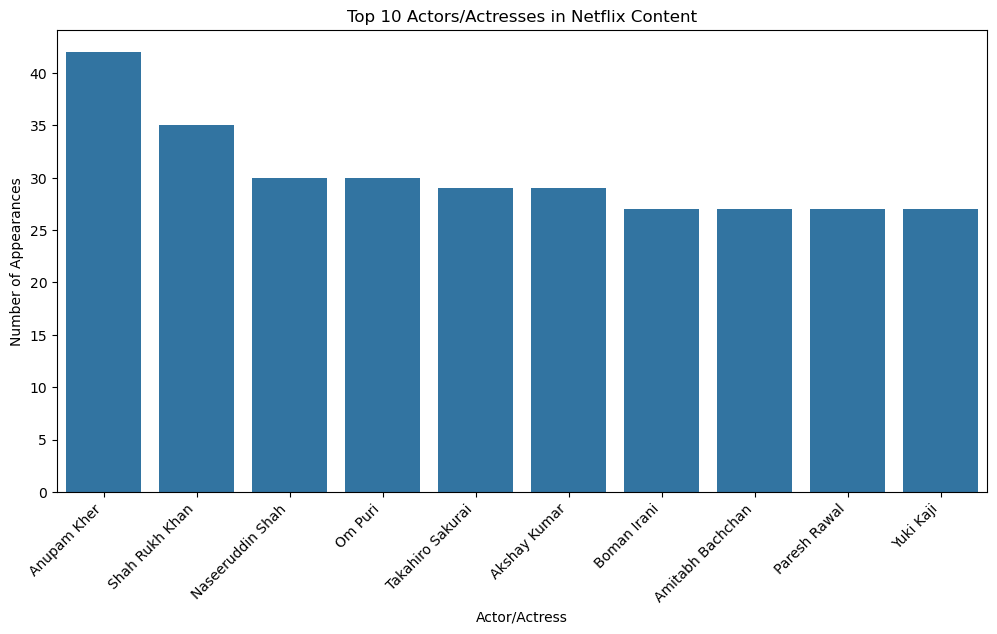

In [192]:
plt.figure(figsize=(12,6))
sns.barplot(x=[name for name, count in top_cast], y=[count for name, count in top_cast])
plt.title('Top 10 Actors/Actresses in Netflix Content')
plt.xlabel('Actor/Actress')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6. 🎬 Director Analysis

#### 6.1 Top 10 Directors by Number of Titles

In [21]:
top_directors = data['Director'].value_counts().head(10)

In [23]:
top_directors

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: count, dtype: int64

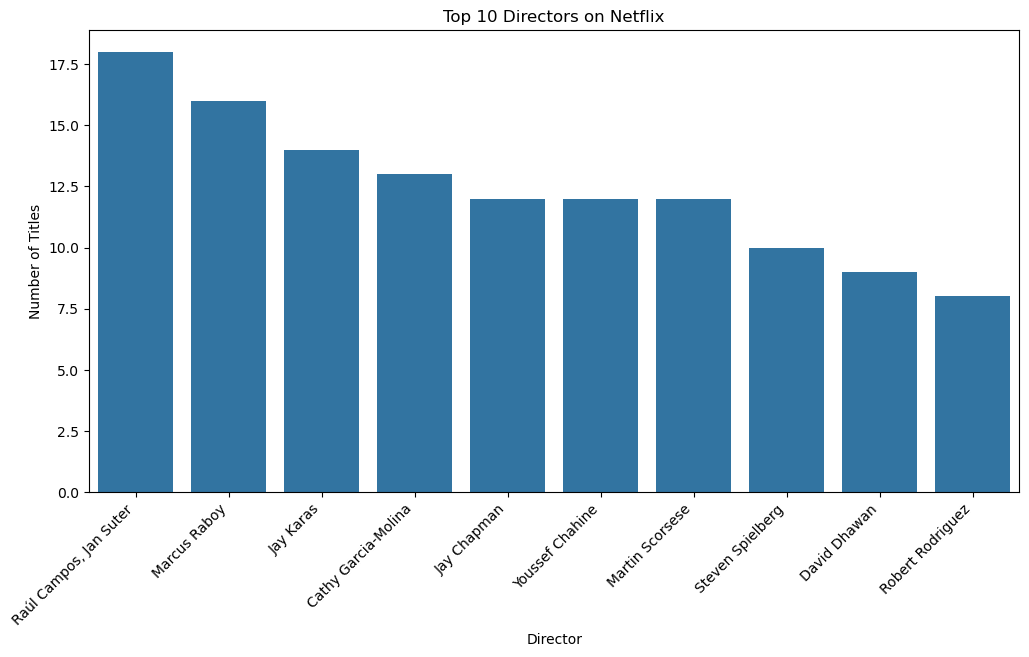

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

### 7. 📺 TV Show Season Analysis

In [21]:
tv_shows = data[data['Type'] == 'TV Show']

In [25]:
# Extract the numeric part of the 'Duration' column
tv_shows['Seasons'] = tv_shows['Duration'].str.extract(r'(\d+)').astype(float)

In [27]:
data = {
    'Duration': ['Season 1: 10 episodes', 'Season 2: 12 episodes', 'Season 3: 8 episodes']
}

In [29]:
tv_shows = pd.DataFrame(data)

In [31]:
tv_shows['Seasons'] = tv_shows['Duration'].str.extract(r'(\d+)').astype(float)

In [33]:
print(tv_shows)

                Duration  Seasons
0  Season 1: 10 episodes      1.0
1  Season 2: 12 episodes      2.0
2   Season 3: 8 episodes      3.0


### 8. Movie and Tv Shows By Country

In [15]:
if 'Country' in data.columns and 'Category' in data.columns:
    country_category_counts = data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

In [17]:
country_category_pct = country_category_counts.div(country_category_counts.sum(axis=1), axis=0) * 100

In [29]:
country_category_pct.head(20)

Category,Movie,TV Show
Country,,
Argentina,68.000000,32.000000
"Argentina, Brazil, France, Poland, Germany, Denmark",100.000000,0.000000
"Argentina, Chile",100.000000,0.000000
"Argentina, Chile, Peru",100.000000,0.000000
"Argentina, France",100.000000,0.000000
"Argentina, France, United States, Germany, Qatar",100.000000,0.000000
"Argentina, Italy",100.000000,0.000000
"Argentina, Spain",87.500000,12.500000
"Argentina, United States",100.000000,0.000000
